<a href="https://colab.research.google.com/github/myowon/-AI/blob/main/Music_visualization_upgrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset (GTZAN): https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

# 모델 불러오기

In [ ]:
import pickle
import xgboost as xgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 저장한 모델 파일의 경로를 지정합니다.
model_filename = '/content/drive/MyDrive/music_classificaton.pkl'

# 모델 파일을 열어 모델을 로드합니다.
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:56:51] WARNING: /workspace/src/common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [ ]:
import librosa
import pandas as pd
import IPython.display as ipd
import cv2

In [ ]:
a = '2.mp3'

In [ ]:
y, sr = librosa.load(a)

print(y)
print(len(y))
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(y) / sr))

ipd.Audio(y, rate=sr)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1816959e-08
 -1.2261808e-08 -4.9203663e-09]
1642176
Sampling rate (Hz): 22050
Audio length (seconds): 74.48


In [ ]:
# 오디오 특성 추출
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
rms = librosa.feature.rms(y=y)
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
harmony, _ = librosa.effects.hpss(y=y)
perceptr = librosa.feature.spectral_flatness(y=y)
tempo = librosa.beat.tempo(y=y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

# 각 특성의 평균 및 분산 계산
chroma_stft_mean = chroma_stft.mean()
chroma_stft_var = chroma_stft.var()
rms_mean = rms.mean()
rms_var = rms.var()
spectral_centroid_mean = spectral_centroid.mean()
spectral_centroid_var = spectral_centroid.var()
spectral_bandwidth_mean = spectral_bandwidth.mean()
spectral_bandwidth_var = spectral_bandwidth.var()
rolloff_mean = rolloff.mean()
rolloff_var = rolloff.var()
zero_crossing_rate_mean = zero_crossing_rate.mean()
zero_crossing_rate_var = zero_crossing_rate.var()
harmony_mean = harmony.mean()
harmony_var = harmony.var()
perceptr_mean = perceptr.mean()
perceptr_var = perceptr.var()

# MFCC 특성은 20개의 차원을 가지므로 각각 평균 및 분산 계산
mfcc_mean = mfccs.mean(axis=1)
mfcc_var = mfccs.var(axis=1)

<ipython-input-11-241a56fc5e5f>:10: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)


In [ ]:
# 데이터 딕셔너리 생성
data = {
    'chroma_stft_mean': [float(chroma_stft_mean)],
    'chroma_stft_var': [chroma_stft_var],
    'rms_mean': [rms_mean],
    'rms_var': [rms_var],
    'spectral_centroid_mean': [spectral_centroid_mean],
    'spectral_centroid_var': [spectral_centroid_var],
    'spectral_bandwidth_mean': [spectral_bandwidth_mean],
    'spectral_bandwidth_var': [spectral_bandwidth_var],
    'rolloff_mean': [rolloff_mean],
    'rolloff_var': [rolloff_var],
    'zero_crossing_rate_mean': [zero_crossing_rate_mean],
    'zero_crossing_rate_var': [zero_crossing_rate_var],
    'harmony_mean': [harmony_mean],
    'harmony_var': [harmony_var],
    'perceptr_mean': [perceptr_mean],
    'perceptr_var': [perceptr_var],
    'tempo': [tempo[0]],
    'mfcc1_mean': [mfcc_mean[0]],
    'mfcc1_var': [mfcc_var[0]],
    'mfcc2_mean': [mfcc_mean[1]],
    'mfcc2_var': [mfcc_var[1]],
    'mfcc3_mean': [mfcc_mean[2]],
    'mfcc3_var': [mfcc_var[2]],
    'mfcc4_mean': [mfcc_mean[3]],
    'mfcc4_var': [mfcc_var[3]],
    'mfcc5_mean': [mfcc_mean[4]],
    'mfcc5_var': [mfcc_var[4]],
    'mfcc6_mean': [mfcc_mean[5]],
    'mfcc6_var': [mfcc_var[5]],
    'mfcc7_mean': [mfcc_mean[6]],
    'mfcc7_var': [mfcc_var[6]],
    'mfcc8_mean': [mfcc_mean[7]],
    'mfcc8_var': [mfcc_var[7]],
    'mfcc9_mean': [mfcc_mean[8]],
    'mfcc9_var': [mfcc_var[8]],
    'mfcc10_mean': [mfcc_mean[9]],
    'mfcc10_var': [mfcc_var[9]],
    'mfcc11_mean': [mfcc_mean[10]],
    'mfcc11_var': [mfcc_var[10]],
    'mfcc12_mean': [mfcc_mean[11]],
    'mfcc12_var': [mfcc_var[11]],
    'mfcc13_mean': [mfcc_mean[12]],
    'mfcc13_var': [mfcc_var[12]],
    'mfcc14_mean': [mfcc_mean[13]],
    'mfcc14_var': [mfcc_var[13]],
    'mfcc15_mean': [mfcc_mean[14]],
    'mfcc15_var': [mfcc_var[14]],
    'mfcc16_mean': [mfcc_mean[15]],
    'mfcc16_var': [mfcc_var[15]],
    'mfcc17_mean': [mfcc_mean[16]],
    'mfcc17_var': [mfcc_var[16]],
    'mfcc18_mean': [mfcc_mean[17]],
    'mfcc18_var': [mfcc_var[17]],
    'mfcc19_mean': [mfcc_mean[18]],
    'mfcc19_var': [mfcc_var[18]],
    'mfcc20_mean': [mfcc_mean[19]],
    'mfcc20_var': [mfcc_var[19]]
}

In [ ]:
music = pd.DataFrame.from_dict(data, orient='index', columns=['new'])

# 데이터프레임 전치
music = music.transpose()

# 데이터프레임 출력
music.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
new          0.320528         0.089298  0.061005  0.002215   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
new              891.843752          167131.062255              1347.784893   

     spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  mfcc16_mean  \
new           164573.498793   1683.979717  1.114047e+06  ...     -1.64126   

     mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
new   62.625778     -1.56244   58.622288    -1.677913   39.726788   

     mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
new    -4.437026   28.607851    -4.856683   37.588055  

[1 rows x 57 columns]

In [ ]:
predict_music = loaded_model.predict(music)
predict_music

array([0])

In [ ]:
music_label =["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
pre = music_label[predict_music[0]]
pre

'blues'

# Stable-diffusion 연결

In [ ]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.10
    Uninstalling wcwidth-0.2.10:
      Successfully uninstalled wcwidth-0.2.10


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

In [ ]:
# 저장한 모델 파일의 경로를 지정합니다.
model_filename = '/content/drive/MyDrive/stable_diffusion.pkl'

# 모델 파일을 열어 모델을 로드합니다.
with open(model_filename, 'rb') as model_file:
    stable_model = pickle.load(model_file)

# 단어별 리스트 30개


In [ ]:
keywords_list = [
  # blues_keywords
  ['Soulful', 'Melancholic', 'Harmonious', 'Emotional', 'Mellow',
    'Reflective', 'Jazzy', 'Slow', 'Groovy', 'Expressive',
    'Upbeat', 'Raw', 'Gritty', 'Powerful', 'Horns', 'Captivating',
    'Storytelling', 'Atmospheric', 'Traditional', 'Unique', 'Soothing', 'love'
    'Chill', 'Sensual', 'Smokey', 'Elegant', 'Sultry', 'Warm', 'Bluesy', 'Laid-back'],

  # classical_keywords
  ['Orchestral', 'Symphonic', 'Timeless', 'Elegance', 'Grand',
    'Baroque', 'Graceful', 'Serene', 'Majestic', 'Choral',
    'Virtuosic', 'Poetic', 'Aesthetic', 'Delicate', 'Opulent',
    'Classical', 'Harmonic', 'Magical', 'Noble', 'Enchanting',
    'Symphony', 'Instrumental', 'Concerto', 'Harpsichord', 'Sonata',
    'Operatic', 'Renaissance', 'Stately', 'Melodic', 'Resplendent'],

  # country_keywords
  ['Rural', 'Western', 'Twangy', 'Roots', 'Folk',
   'Southern', 'Honest','Simple', 'Heartfelt', 'Acoustic',
   'Bluegrass', 'Saddle', 'Countryside', 'Cowboy boots','Lonesome',
   'Hoedown', 'Rodeo', 'Truck', 'Campfire', 'Rustic',
   'Giddy-up', 'Barbecue','Front porch', 'Sunset', 'Barn',
   'Harmony', 'Ranch', 'Fiddle', 'Banjo', 'Chorus'],

  # disco_keywords
  ['Danceable', 'Groovy', 'Funky', 'Energetic', 'Party',
    'Sequins', 'Boogie', 'Studio 54',
    'Nightlife', 'Glam', 'Mirror ball', 'High-energy', 'Dance floor',
    'Discotheque', 'Polyester', 'Soul train', 'Hustle',
    'Thumping', 'Divas', 'Fever', 'Saturday night', 'Clubbing',
    'Groove', 'Beat', 'Neon', 'Retro', 'Danceable', 'Groovy', 'Funky', 'Energetic'],

  # hiphop_keywords
  ['Urban', 'Rhythmic', 'Street', 'Beat', 'Lyricism',
   'Rhymes', 'Flow', 'Rap', 'Graffiti', 'Breakdancing',
   'Turntablism', 'Sampling', 'Swagger', 'Mic', 'Crew',
   'Underground', 'Hip-hop culture', 'Boombox', 'Freestyle', 'America',
   'Producer', 'Trap', 'Bass','Hype', 'Dope',
   'Lyrical', 'B-boy', 'East Coast', 'West Coast', 'Mixtape'],

  # jazz_keywords
  ['Swing', 'Improvisation', 'Syncopation', 'Groove', 'Cool',
    'Saxophone', 'Trumpet', 'Piano', 'Double bass', 'Jam session',
    'Chord progressions', 'Polyphony', 'Big band', 'Smooth', 'Modal',
    'Bebop', 'Fusion', 'Experimental', 'Jazzercise', 'Birdland',
    'Blue note', 'Scat singing', 'Miles Davis', 'Dizzy Gillespie', 'Piano'
    'Thelonious Monk', 'Dave Brubeck', 'Ella Fitzgerald', 'John Coltrane', 'Soulful'],

  # metal_keywords
  ['Heavy', 'Distorted', 'Loud', 'Aggressive', 'Headbanging',
    'Guitar solo', 'Drum solo', 'Power chords', 'Double bass drum', 'Powerful'
    'Shredding', 'Mosh pit', 'Screaming', 'Dark', 'Intense',
    'Thrash', 'Death metal', 'Black metal', 'Gothic', 'Satanic',
    'Brutal', 'Metalhead', 'Melodic', 'Slayer', 'Metallica',
    'Iron Maiden', 'Megadeth', 'Black Sabbath', 'Pantera', 'Cannibal Corpse'],

  # pop_keywords
  ['Pop', 'Melodic', 'Calm', 'Heartfelt', 'Harmony',
    'garden', 'Nature', 'Romantic', 'Love', 'Sentimental',
    'Gentle', 'Touched', 'Bright', 'Emotions', 'Farewell',
    'Various', 'Freshness', 'Billboards', 'Warm', 'Lyrics',
    'Music video', 'Popular', 'Happiness', 'Hope', 'Chart',
    'Sentiment', 'Groovy', 'Bubblegum', 'Trendy', 'Lovely'],

  # reggae_keywords
  ['Island', 'Rasta', 'Dub', 'Relaxing', 'Groove',
    'Drums', 'Bassline', 'One drop', 'Skank', 'Dreadlocks',
    'Marijuana', 'Jamaica', 'vibe', 'Roots', 'Lovers rock',
    'Toasting', 'Sound system', 'Riddim', 'Studio', 'Ska',
    'Rocksteady', 'Bob Marley', 'Peter Tosh', 'Bunny Wailer', 'Sunshine',
    'Lee "Scratch" Perry', 'Jimmy Cliff', 'Toots and the Maytals',
    'Ziggy Marley', 'Groove'],

  # rock_keywords
  ['Guitar', 'Drums', 'Loud', 'Energetic', 'Powerful',
    'Distorted', 'Anthem', 'Solo', 'Rock and roll', 'Arena',
    'bright', 'rythm', 'Classic', 'Ballad', 'Chorus',
    'Electric', 'colorful', 'Soft rock', 'Psychedelic', 'Bluesy',
    'Rebellious', 'bit', 'Amp', 'Feedback', 'Band',
    'music', 'Riff', 'Concert', 'Stage', 'Rockstar']
]

In [ ]:
import random

# 최대 10개의 단어를 랜덤으로 선택
max_num_words = 10
selected_words = random.sample(keywords_list[predict_music[0]], random.randint(1, max_num_words))

output_string = ', '.join(selected_words)
print(output_string)

Smokey


  0%|          | 0/50 [00:00<?, ?it/s]

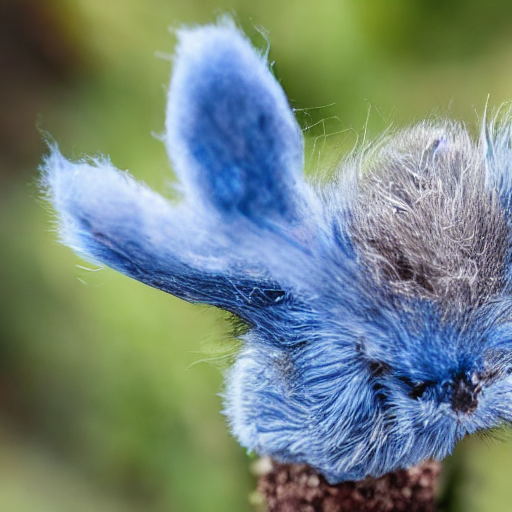

In [ ]:
prompt = pre + output_string
image = stable_model(prompt).images[0]
image

In [ ]:
num_images = 5
prompt = [pre + output_string] * num_images

images = stable_model(prompt).images

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


In [ ]:
for i in range(num_images):
  img = images[i]
  img.save(f"{i}.png")
  image = cv2.imread(f"{i}.png")
  image_with_alpha = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
  alpha_value = 128
  image_with_alpha[:, :, 3] = alpha_value
  cv2.imwrite(f"{i}.png", image_with_alpha)

In [ ]:
pip install pydub

In [ ]:
from pydub import AudioSegment

# MP3 파일을 읽어오기
audio = AudioSegment.from_mp3(a)

# WAV 파일로 저장하기
audio.export("change.wav", format="wav")

<_io.BufferedRandom name='change.wav'>

# 주파수

In [ ]:
import struct
import wave
import os
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import librosa
from PIL import Image
import matplotlib.image as mpimg
from concurrent.futures import ProcessPoolExecutor
from moviepy.editor import VideoFileClip
from moviepy.audio.io import AudioFileClip
from moviepy.editor import AudioFileClip

TITLE = ''
WIDTH = 800
HEIGHT = 800
FPS = 5.0

nFFT = 256
BUF_SIZE = 4 * nFFT
SAMPLE_SIZE = 2
CHANNELS = 2
RATE = 44100
BACKGROUND_CHANGE_INTERVAL = 10.0  # 10초마다 배경 변경
color_index = 0

def load_audio(audio_file):
    # 오디오 파일을 로드하고 파형 및 샘플링 주파수를 얻습니다.
    y, sr = librosa.load(audio_file, sr=None)
    return y, sr

In [ ]:
def create_wave1(audio_file, images, color_list, TITLE='', FPS=5.0, nFFT=256, SAMPLE_SIZE=2, CHANNELS=2, RATE=44100, BACKGROUND_CHANGE_INTERVAL=10.0):
    # 함수 내에서 사용하는 변수들을 여기에 정의합니다.
    current_color = color_list[0]
    color_index = 0

    # wave1 함수 내부를 정의합니다.
    def wave1(i, line, wf, MAX_y, ax):
        nonlocal current_color, color_index
        image_height, image_width = images[0].shape[:2]
        black_background = np.zeros((image_height, image_width, 3), dtype=np.uint8)

        x_f = 1.0 * np.arange(-nFFT / 2 + 1, nFFT / 2) / nFFT * RATE

        if i % (FPS * BACKGROUND_CHANGE_INTERVAL) == 0:
            current_background_index = int(i // (FPS * BACKGROUND_CHANGE_INTERVAL)) % len(images)
            background_image = images[current_background_index]
            ax.imshow(black_background, aspect='auto', extent=[x_f[0], x_f[-1], 0, 2 * np.pi * nFFT ** 2 / RATE])
            ax.imshow(background_image, aspect='auto', extent=[x_f[0], x_f[-1], 0, 2 * np.pi * nFFT ** 2 / RATE])
            print(f"Changed background to image {current_background_index}")

        if i % (FPS * BACKGROUND_CHANGE_INTERVAL) == 0:
            color_index = (color_index + 1) % len(color_list)
            current_color = color_list[color_index]
            line.set_color(current_color)

        N = int((int((i + 1) * RATE / FPS) - wf.tell()) / nFFT)
        if not N:
            return line,
        N *= nFFT
        data = wf.readframes(N)
        # print('{:5.1f}% - V: {:5,d} - A: {:10,d} / {:10,d}'.format(
        #     100.0 * wf.tell() / wf.getnframes(), i, wf.tell(), wf.getnframes()
        # ))

        y = np.array(struct.unpack("%dh" % (len(data) / SAMPLE_SIZE), data)) / MAX_y
        y_L = y[::2]
        y_R = y[1::2]

        Y_L = np.fft.fft(y_L, nFFT)
        Y_R = np.fft.fft(y_R, nFFT)

        Y = abs(np.hstack((Y_L[-nFFT // 2:-1].astype(int), Y_R[:nFFT // 2].astype(int))))

        line.set_ydata(Y)
        ax.set_axis_off()

        return line,

    def init():
        fig = plt.figure(figsize=(12, 12))
        fig.patch.set_facecolor('black')

        x_f = 1.0 * np.arange(-nFFT / 2 + 1, nFFT / 2) / nFFT * RATE
        ax = fig.add_subplot(111, title=TITLE, xlim=(x_f[0], x_f[-1]),
                               ylim=(0, 2 * np.pi * nFFT ** 2 / RATE))
        ax.set_yscale('symlog', linthresh=nFFT ** 0.5)

        ax.imshow(images[0], aspect='auto', extent=[x_f[0], x_f[-1], 0, 2 * np.pi * nFFT ** 2 / RATE])

        line, = ax.plot(x_f, np.zeros(nFFT - 1))
        line.set_color('yellow')
        line.set_linewidth(2.0)

        MAX_y = 2.0 ** (SAMPLE_SIZE * 8 - 1)
        wf = wave.open(audio_file, 'rb')
        assert wf.getnchannels() == CHANNELS
        assert wf.getsampwidth() == SAMPLE_SIZE
        assert wf.getframerate() == RATE
        frames = wf.getnframes()

        ani = animation.FuncAnimation(
            fig, wave1, int(frames / RATE * FPS),
            init_func=None, fargs=(line, wf, MAX_y, ax),
            interval=1000.0 / FPS, blit=True
        )

        ani.save('final.mp4', fps=FPS)

        wf.close()
    if __name__ == '__main__':
        init()

In [ ]:
def create_wave2(audio_file, images, color_list, FPS=5, BACKGROUND_CHANGE_INTERVAL=10):
    global color_index

    y, sr = load_audio(audio_file)
    N = len(y)  # 음악 파일의 총 샘플 수
    duration = N / sr  # 음악 파일의 총 재생 시간 (초)

    def init():
        line.set_data([], [])
        return line,

    def wave2(i):
        global current_color, color_index
        image_height, image_width = images[0].shape[:2]
        black_background = np.zeros((image_height, image_width, 3), dtype=np.uint8)

        if i % (FPS * BACKGROUND_CHANGE_INTERVAL) == 0:
            current_background_index = int(i // (FPS * BACKGROUND_CHANGE_INTERVAL)) % len(images)
            background_image = images[current_background_index]
            ax.imshow(black_background, aspect='auto',extent=[0, duration, -1, 1])
            ax.imshow(background_image, aspect='auto', extent=[0, duration, -1, 1])
            print(f"Changed background to image {current_background_index}")

        if i % (FPS * BACKGROUND_CHANGE_INTERVAL) == 0:
          color_index = (color_index + 1) % len(color_list)
          current_color = color_list[color_index]
          line.set_color(current_color)

        t = i / FPS  # 현재 시간 (초)
        start_sample = int(t * sr)
        end_sample = min(start_sample + int(sr / FPS), N)
        y_subset = y[start_sample:end_sample]
        x_subset = np.linspace(0, duration, len(y_subset))
        line.set_data(x_subset, y_subset)
        return line,

    # 파형 시각화 설정
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 12)
    fig.patch.set_facecolor('black')
    line, = ax.plot([], [])
    ax.set_xlim(0, duration)
    ax.set_ylim(-1, 1)  # 파형의 값 범위 조절
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_axis_off()

    # 애니메이션 객체 생성
    ani = animation.FuncAnimation(fig, wave2, init_func=init, frames=int(duration * FPS), interval=1000 / FPS, blit=True)

    # 애니메이션 저장
    ani.save('final.mp4', fps=FPS)

In [ ]:
def create_wave3(audio_file, images, color_list, FPS=5, BACKGROUND_CHANGE_INTERVAL=10,
                          min_frequency=20, max_frequency=2000, max_amplitude=0.01,
                          fixed_period=0.2, moving_speed=0.1):
    global color_index

    # 오디오 파일을 로드하고 파형 및 샘플링 주파수를 얻습니다.
    y, sr = librosa.load(audio_file, sr=None)

    # 파형을 시간에 따라 부드럽게 표현하기 위한 파라미터 설정
    N = len(y)  # 음악 파일의 총 샘플 수
    duration = N / sr  # 음악 파일의 총 재생 시간 (초)

    def init():
        line.set_data([], [])
        return line,

    def wave3(i):
        global current_color, color_index
        image_height, image_width = images[0].shape[:2]
        black_background = np.zeros((image_height, image_width, 3), dtype=np.uint8)

        if i % (FPS * BACKGROUND_CHANGE_INTERVAL) == 0:
            current_background_index = int(i // (FPS * BACKGROUND_CHANGE_INTERVAL)) % len(images)
            background_image = images[current_background_index]
            ax.imshow(black_background, aspect='auto', extent=[0, 1, -1, 1])
            ax.imshow(background_image, aspect='auto', extent=[0, 1, -1, 1])
            print(f"Changed background to image {current_background_index}")

        # 10초마다 다른 색상 적용
        if i % (FPS * BACKGROUND_CHANGE_INTERVAL) == 0:
            color_index = (color_index + 1) % len(color_list)
            current_color = color_list[color_index]
            line.set_color(current_color)

        t = i / FPS  # 현재 시간 (초)
        start_sample = int(t * sr)
        end_sample = min(start_sample + int(sr / FPS), N)
        y_subset = y[start_sample:end_sample]
        x_subset = np.linspace(0, duration, len(y_subset))

        # 주파수 대역 내에서 사인파의 진폭 계산
        frequency_sum = np.sum(y_subset[min_frequency:max_frequency])

        amplitude = max_amplitude * frequency_sum

        # 현재 시간과 이동 속도를 고려하여 x 위치를 계산 (오른쪽으로 이동)
        x = x_subset - t * moving_speed

        line.set_data(x, amplitude * np.sin(2 * np.pi / fixed_period * (x + t * moving_speed)))
        line.set_linewidth(5.0)
        return line,

    # 파형 시각화 설정
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 12)
    fig.patch.set_facecolor('black')
    line, = ax.plot([], [])
    ax.set_xlim(0, 1)
    ax.set_ylim(-1, 1)  # 진폭 범위 설정
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_axis_off()

    # 애니메이션 객체 생성
    ani = animation.FuncAnimation(fig, wave3, init_func=init, frames=int(duration * FPS), interval=1000 / FPS, blit=True)

    # 애니메이션 저장
    ani.save('final.mp4', fps=FPS)


In [ ]:
def create_wave4(audio_file, images, colors, FPS=5, BACKGROUND_CHANGE_INTERVAL=10):

    y, sr = load_audio(audio_file)
    N = len(y)  # 음악 파일의 총 샘플 수
    duration = N / sr  # 음악 파일의 총 재생 시간 (초)

    D = np.abs(librosa.stft(y))
    frequencies = D.T

    def init():
        ax.set_xlim(70, len(frequencies[0]) + 70)
        ax.set_ylim(0, 120)
        return rectangles

    # 애니메이션 업데이트 함수
    def wave4(frame):
        ax.set_xlim(70, len(frequencies[0]) + 70)
        ax.set_ylim(0, 120)
        ax.set_xlabel("Frequency")
        ax.set_ylabel("Amplitude")
        ax.set_axis_off()

        rectangles.clear()

        image_height, image_width = images[0].shape[:2]
        black_background = np.zeros((image_height, image_width, 3), dtype=np.uint8)

        if frame % (FPS * BACKGROUND_CHANGE_INTERVAL) == 0:
            current_background_index = int(frame // (FPS * BACKGROUND_CHANGE_INTERVAL)) % len(images)
            background_image = images[current_background_index]
            ax.imshow(black_background, aspect='auto', extent=[0, 1200, 0, 120])
            ax.imshow(background_image, aspect='auto', extent=[0, 1200, 0, 120])
            print(f"Changed background to image {current_background_index}")

        reduced_frame = frequencies[frame][::50]

        if hasattr(wave4, 'rectangles'):
            for rect, freq in zip(wave4.rectangles, reduced_frame):
                rect.set_height(freq * 10)
        else:
            wave4.rectangles = []
            for i, freq in enumerate(reduced_frame):
                x_pos = i * 60 + i * 10
                y_pos = freq * 20
                color = colors[i % len(colors)]
                rect = plt.Rectangle((x_pos, 0), 60, y_pos, color=color)
                ax.add_patch(rect)
                wave4.rectangles.append(rect)

        percent_complete = (frame + 1) / int(duration * FPS) * 100
        print(f"진행 상황: {percent_complete:.2f}% 완료")
        return wave4.rectangles

    fig, ax = plt.subplots()
    rectangles = []
    fig.set_size_inches(12, 12)
    fig.patch.set_facecolor('black')

    ani = animation.FuncAnimation(fig, wave4, frames=int(duration * FPS), init_func=init, blit=True, repeat=False)
    ani.save('final.mp4', fps=FPS)

Changed background to image 0
진행 상황: 0.18% 완료
진행 상황: 0.37% 완료
진행 상황: 0.55% 완료
진행 상황: 0.74% 완료
진행 상황: 0.92% 완료
진행 상황: 1.11% 완료
진행 상황: 1.29% 완료
진행 상황: 1.48% 완료
진행 상황: 1.66% 완료
진행 상황: 1.85% 완료
진행 상황: 2.03% 완료
진행 상황: 2.21% 완료
진행 상황: 2.40% 완료
진행 상황: 2.58% 완료
진행 상황: 2.77% 완료
진행 상황: 2.95% 완료
진행 상황: 3.14% 완료
진행 상황: 3.32% 완료
진행 상황: 3.51% 완료
진행 상황: 3.69% 완료
진행 상황: 3.87% 완료
진행 상황: 4.06% 완료
진행 상황: 4.24% 완료
진행 상황: 4.43% 완료
진행 상황: 4.61% 완료
진행 상황: 4.80% 완료
진행 상황: 4.98% 완료
진행 상황: 5.17% 완료
진행 상황: 5.35% 완료
진행 상황: 5.54% 완료
진행 상황: 5.72% 완료
진행 상황: 5.90% 완료
진행 상황: 6.09% 완료
진행 상황: 6.27% 완료
진행 상황: 6.46% 완료
진행 상황: 6.64% 완료
진행 상황: 6.83% 완료
진행 상황: 7.01% 완료
진행 상황: 7.20% 완료
진행 상황: 7.38% 완료
진행 상황: 7.56% 완료
진행 상황: 7.75% 완료
진행 상황: 7.93% 완료
진행 상황: 8.12% 완료
진행 상황: 8.30% 완료
진행 상황: 8.49% 완료
진행 상황: 8.67% 완료
진행 상황: 8.86% 완료
진행 상황: 9.04% 완료
진행 상황: 9.23% 완료
Changed background to image 1
진행 상황: 9.41% 완료
진행 상황: 9.59% 완료
진행 상황: 9.78% 완료
진행 상황: 9.96% 완료
진행 상황: 10.15% 완료
진행 상황: 10.33% 완료
진행 상황: 10.52% 완료
진행 상황: 10.70% 완료
진행 상황: 1

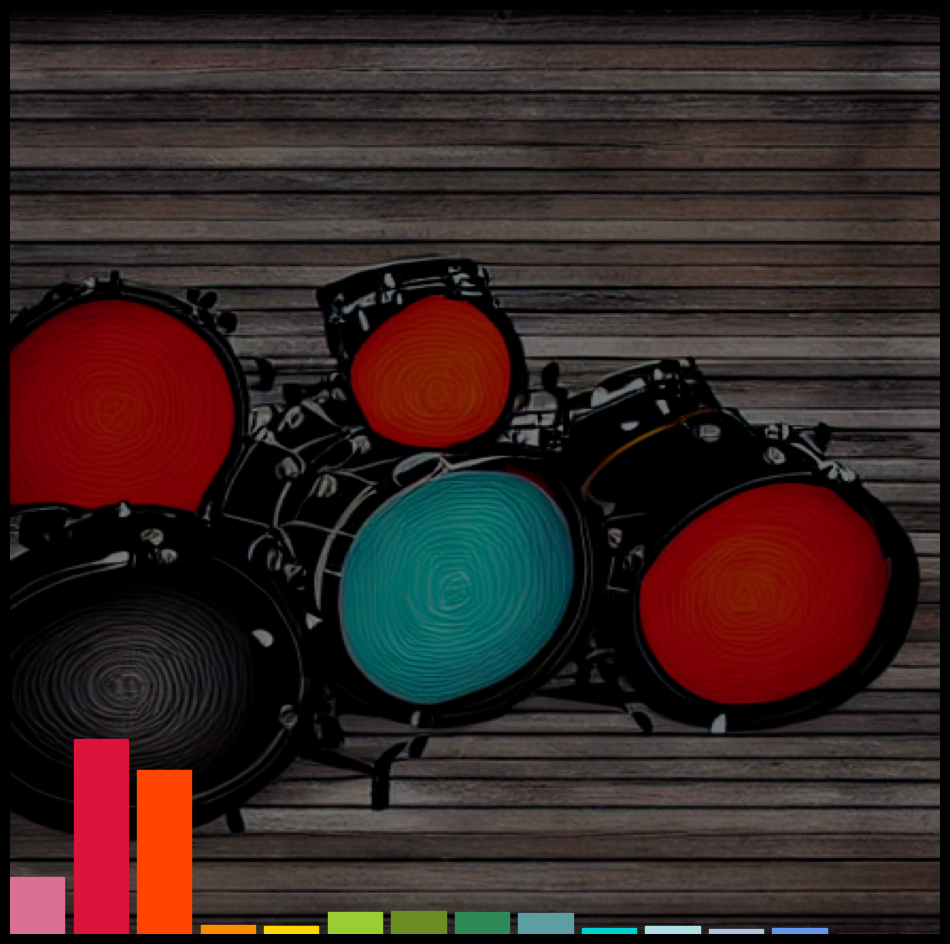

In [ ]:
if __name__ == '__main__':
    image_folder = '/content'
    images = []

    # 이미지 폴더에서 이미지 파일들을 불러와서 uint8로 변환하여 images 리스트에 저장
    for img_name in os.listdir(image_folder):
        if img_name.endswith(".png"):
            img_path = os.path.join(image_folder, img_name)
            img = mpimg.imread(img_path)  # 이미지를 올바르게 불러오기
            images.append(img)

    # 변경할 색상 목록
    colors = ['slateblue', 'palevioletred','crimson','orangered','darkorange',
              'gold','yellowgreen','olivedrab','seagreen','cadetblue','darkturquoise',
              'powderblue','lightsteelblue','cornflowerblue','royalblue']

    # 음악 파일 경로 설정
    audio_file = 'change.wav'

    if pre in ['blues', 'classical', 'pop', 'country']:
      option = [create_wave3, create_wave4]
      selected_function = random.choice(option)
      selected_function(audio_file, images, colors)
    else:
      option = [create_wave1, create_wave2, create_wave4]
      selected_function = random.choice(option)
      selected_function(audio_file, images, colors)

In [ ]:
video_clip = VideoFileClip('final.mp4')
audio_clip = AudioFileClip('change.wav')
final_audio = video_clip.set_audio(audio_clip)
final_audio.write_videofile('finish.mp4', codec='libx264')

Moviepy - Building video finish.mp4.
MoviePy - Writing audio in finishTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video finish.mp4



Moviepy - Done !
Moviepy - video ready finish.mp4
